Model Selection and Assesment
=======

In [11]:
%pylab inline
import pylab as pl
import numpy as np
#some nice default plot configurations
pl.rcParams['figure.figsize'] = 10, 7.5
pl.rcParams['axes.grid'] = True
pl.gray()

Populating the interactive namespace from numpy and matplotlib


In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [19]:
X, y = digits.data, digits.target
print('data shape: %r, target shape: %r' % (X.shape, y.shape))
print('classes: %r' % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [22]:
n_samples, n_features = X.shape
print('n_samples: %d' % n_samples)
print('n_features : %d' % n_features)

n_samples: 1797
n_features : 64


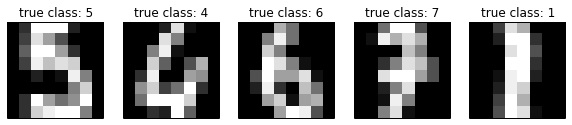

In [36]:
for i, j in enumerate(np.random.permutation(X.shape[0])[:5]):
    pl.subplot(1,5,(i+1))
    pl.imshow(X[j].reshape((8,8)), interpolation='nearest')
    pl.title('true class: %d' % y[j])
    pl.xticks(()), pl.yticks(())

In [37]:
from sklearn.decomposition import RandomizedPCA
%time X_pca = RandomizedPCA(n_components=2).fit_transform(X)
X_pca.shape

CPU times: user 8.58 ms, sys: 291 µs, total: 8.87 ms
Wall time: 327 ms


(1797, 2)

In [44]:
from itertools import cycle
colors = ['b', 'g', 'r' , 'c', 'm', 'y', 'k']
for i, c in zip(np.unique(y), cycle(colors)):
    pl.scatter(X_pca[y == i, 0], X_pca[ y == i, 1],
               o=o, label =1, alpha = 0.5)

NameError: name 'o' is not defined

Overfitting 
=========

In [47]:
from sklearn.svm import SVC
SVC().fit(X,y).score(X,y)
#the score is the score of correct classificatoin (so if its 1, its perfect) we should be sleptical

1.0

In [46]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 0)

In [51]:
svc = SVC(kernel ='rbf').fit(X_train, y_train)
train_score = svc.score(X_train, y_train)
train_score

1.0

In [52]:
test_score = svc.score(X_test, y_test)
test_score

0.48666666666666669

Clearly the model is not good because the model is overfitted. It is not able to generalize since there is a big gap between the train and the test set. Basically, it is not general enough. We need tp use cross validation to get better parameters for the svc model and see if we can find a better one that is able to generalize better. 

Cross Validation
=============

In [58]:
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(n_samples, n_iter = 3, test_size=0.1,
                  random_state=0)

for cv_index, (train, test) in enumerate(cv):
    print('# Cross Validation ITeration #%d' % cv_index)
    print('train indices: {0}...'.format(train[:10]))
    print('test indices: {0}...'.format(test[:10]))
    95

svc = SVC(kernel='rbf', C=1, gamma = 0.001).fit(X[train], y[train])
print('trainscore: {0:3f}, test score: {1:3f}\n'.format(
        svc.score(X[train], y[train]), svc.score(X[test],y[test])))

# Cross Validation ITeration #0
train indices: [ 353    5   58 1349 1025  575 1074 1110 1745  689]...
test indices: [1081 1707  927  713  262  182  303  895  933 1266]...
# Cross Validation ITeration #1
train indices: [1336  608  977   22  526 1587 1130  569 1481  962]...
test indices: [1014  755 1633  117  181  501  948 1076   45  659]...
# Cross Validation ITeration #2
train indices: [ 451  409  911 1551  133  691 1306  111  852  825]...
test indices: [ 795  697  655  573  412  743  635  851 1466 1383]...
trainscore: 0.998763, test score: 0.994444



In [75]:
from sklearn.cross_validation import cross_val_score

svc = SVC(kernel='rbf', C=1, gamma =0.001)
cv = ShuffleSplit(n_samples, n_iter=50, test_size=0.1,
                  random_state =0)

%time test_scores =cross_val_score(svc, X, y, cv =cv, n_jobs=2)
test_scores

CPU times: user 217 ms, sys: 137 ms, total: 353 ms
Wall time: 4.96 s


array([ 0.98888889,  0.99444444,  0.99444444,  0.99444444,  0.99444444,
        0.99444444,  0.98888889,  0.99444444,  0.98888889,  1.        ,
        0.98333333,  0.98333333,  1.        ,  0.98888889,  0.99444444,
        0.99444444,  0.98888889,  0.99444444,  0.99444444,  0.99444444,
        0.98888889,  1.        ,  0.98333333,  0.98888889,  0.97777778,
        1.        ,  1.        ,  0.98888889,  1.        ,  0.98888889,
        0.99444444,  0.99444444,  1.        ,  1.        ,  1.        ,
        0.98888889,  0.99444444,  0.98888889,  0.99444444,  1.        ,
        1.        ,  0.98888889,  0.98888889,  0.98888889,  1.        ,
        0.99444444,  0.99444444,  0.99444444,  0.98888889,  0.98333333])

In [80]:
from sklearn.cross_validation import ShuffleSplit
ShuffleSplit?